## **Preprocessing**

In [ ]:
# mounting google drive to colab virtual machine

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


%cd '/content/drive/MyDrive/DL_Project/CACD_preprocess/'

Mounted at /content/drive
/content/drive/MyDrive/DL_Project/CACD_preprocess


In [ ]:
%cd '/content/drive/MyDrive/DL_Project/update'

/content/drive/MyDrive/DL_Project/update


In [ ]:
!pwd

/content/drive/MyDrive/DL_Project/update


In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 93 kB/s 
     |████████████████████████████████| 6.8 MB 47.7 MB/s 
     |████████████████████████████████| 981 kB 51.7 MB/s 
     |████████████████████████████████| 263 kB 61.2 MB/s 
     |████████████████████████████████| 1.9 MB 44.1 MB/s 
     |████████████████████████████████| 1.2 MB 52.3 MB/s 
     |████████████████████████████████| 468 kB 54.4 MB/s 
     |████████████████████████████████| 895 kB 38.4 MB/s 
     |████████████████████████████████| 3.3 MB 38.6 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.1-py3-none-any.whl size=25282876 sha256=badbe8c10f7facf3d222b1209d9916af5bd2c7af5c4b3bb452d4828daa30f3de
  Stored in directory: /root/.cache/pip/wheels/dd/88/9f/06a5d95fa827fda1af47f5c9eca78c6233928f0455171d3711
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=33e105e084653a7a231147c35274780dc2ae1a3092d67f5238d64071a695fedc
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff0

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 6.3 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=8124aa9bcad45ca0cf195aa8027fe7312dd1766c8faadeb9fe8040746854f263
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import ktrain
from ktrain import vision as vis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import os
import face_recognition
from PIL import Image
import shutil
import re
import glob
import ntpath
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import pickle

In [ ]:
!pwd

/content/drive/My Drive/DL_Project/update


In [ ]:
!unzip '/content/drive/My Drive/DL_Project/CACD_preprocess/CACD_centered.zip' -d /content/

Streaming output truncated to the last 5000 lines.
         continuing with "central" filename version
  inflating: /content/CACD_centered/58_Stellan_SkarsgÃ¥rd_0012.jpg  
CACD_centered/58_Stellan_SkarsgÃ¥rd_0014.jpg:  mismatching "local" filename (CACD_centered/58_Stellan_Skarsg├Г┬еrd_0014.jpg),
         continuing with "central" filename version
  inflating: /content/CACD_centered/58_Stellan_SkarsgÃ¥rd_0014.jpg  
  inflating: /content/CACD_centered/58_Stephen_Lang_0001.jpg  
  inflating: /content/CACD_centered/58_Stephen_Lang_0002.jpg  
  inflating: /content/CACD_centered/58_Stephen_Lang_0004.jpg  
  inflating: /content/CACD_centered/58_Stephen_Lang_0008.jpg  
  inflating: /content/CACD_centered/58_Stephen_Lang_0010.jpg  
  inflating: /content/CACD_centered/58_Stephen_Lang_0015.jpg  
  inflating: /content/CACD_centered/58_Stephen_Root_0003.jpg  
  inflating: /content/CACD_centered/58_Stephen_Root_0005.jpg  
  inflating: /content/CACD_centered/58_Stephen_Root_0006.jpg  
  inflating: /

In [ ]:
img_dir = '/content/CACD_centered/'

In [ ]:
#listing the names of images in the image directory
list_of_img_names = os.listdir(img_dir)

In [ ]:
#taking out the age from the image names for our target variable
age = np.array([names.split('_')[0] for names in list_of_img_names], 
               dtype=np.float32)

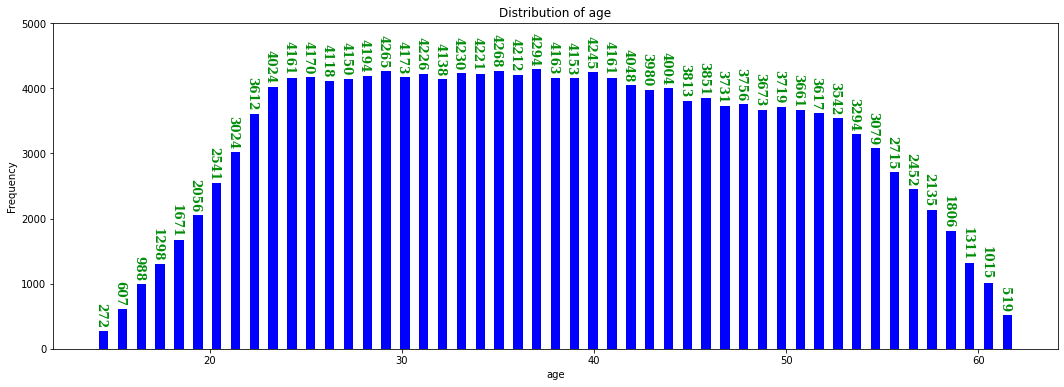

In [ ]:

font = {'family': 'serif',
        'color':  '#008D08',
        'weight': 'bold',
        'size': 12,
        }
#plt.rcParams["figure.figsize"] = (22,10)
plt.figure(figsize=(18,6))
arr= plt.hist(x=age, bins=np.count_nonzero(np.unique(age)), align='mid',rwidth=.5,color='b')
for i in range(np.count_nonzero(np.unique(age))):
    plt.text(arr[1][i],arr[0][i]+100,int(arr[0][i]),fontdict=font,rotation=-90)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
bottom, top = plt.ylim()
plt.ylim((bottom,top+500))


plt.show()

## Training the model

In [ ]:
#Image pattern 
pattern=r'([\d]+)_\w+_\d+.jpg$'
p=re.compile(pattern)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#train test split
(train_data,test_data,preprocess)=vis.images_from_fname(img_dir,
                                                        pattern=pattern,
                                                        val_pct=0.2,
                                                        is_regression=True,
                                                        random_state=42,
                                                        data_aug=ImageDataGenerator(
                                                                  width_shift_range=0.1,
                                                                  height_shift_range=0.1, 
                                                                  horizontal_flip=True,
                                                                  rotation_range=45)
)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/CACD_centered/48_John_C._Reilly_0009.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/CACD_centered/38_Nikolaj_Coster-Waldau_0014.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/CACD_centered/33_Alex_O'Loughlin_0008.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/CACD_centered/47_Michael_K._Williams_0

['label']
        label
130418   48.0
33060    29.0
75847    55.0
117860   45.0
75241    51.0
['label']
       label
82957   34.0
60768   24.0
63047   23.0
71004   40.0
78169   53.0
Found 120744 validated image filenames.
Found 30186 validated image filenames.


In [ ]:
#available image regression model
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [ ]:
#building a model
model=vis.image_regression_model('pretrained_resnet50',
                                 train_data=train_data,
                                 val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#learner parameters
training=ktrain.get_learner(model=model,
                            train_data=train_data,
                            val_data=test_data,
                            batch_size=64)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1886/1886 [==============================] - 847s 449ms/step - loss: 535.4893 - mae: 6.5446


done.
Visually inspect loss plot and select learning rate associated with falling loss


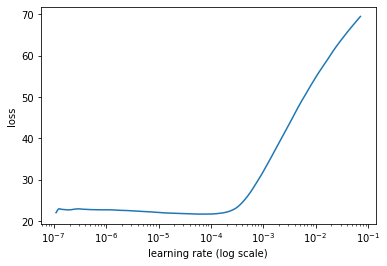

In [ ]:
training.lr_find(show_plot=True, restore_weights_only=True)

In [ ]:
training.set_weight_decay(10**-3)

/usr/local/lib/python3.7/dist-packages/ktrain/core.py:377: UserWarning: recompiling model to use AdamWeightDecay as opimizer with weight decay of 0.001
  warnings.warn('recompiling model to use AdamWeightDecay as opimizer with weight decay of %s' % (wd) )


In [ ]:
!pwd

/content/drive/My Drive/DL_Project/update


In [ ]:
model.load_weights('/content/drive/My Drive/DL_Project/update/weights-03.hdf5')

In [ ]:
#training the model with 2 epochs and learning rate = 10^-4
training.fit_onecycle(1e-4,2,checkpoint_folder='/content/drive/MyDrive/DL_project/')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
1886/1886 [==============================] - 544s 271ms/step - loss: 146.9363 - mae: 9.4393 - val_loss: 88.5315 - val_mae: 7.5368
Epoch 2/2
1886/1886 [==============================] - 504s 267ms/step - loss: 85.9126 - mae: 7.3831 - val_loss: 81.2855 - val_mae: 7.1454


In [ ]:
print(training.get_weight_decay())

0.001


In [ ]:
mae=[9.7028, 7.9876, 6.9388, 6.1731, 5.9146, 5.43145751953125, 5.4384589195251465, 5.487170219421387, 5.204601764678955, 4.83113431930542, 4.7636, 4.95, 5.0877, 4.7607, 4.8367, 4.9354, 4.7024, 4.365, 4.3475799560546875, 4.521537780761719, 4.697944164276123, 4.4693803787231445, 4.117332935333252, 4.131679534912109, 4.466404438018799, 4.104224681854248]
val_mae=[8.0117, 7.5809, 5.9674, 6.3078, 5.6124, 5.449876308441162, 5.407055854797363, 5.49222469329834, 5.0487847328186035, 4.817783355712891, 4.9171, 5.195, 5.3607, 4.6827, 5.035, 4.9048, 4.5954, 4.46, 4.625881195068359, 4.820620536804199, 4.808809280395508, 4.532168865203857, 4.3859944343566895, 4.64047384262085, 4.688878536224365, 4.438120365142822]

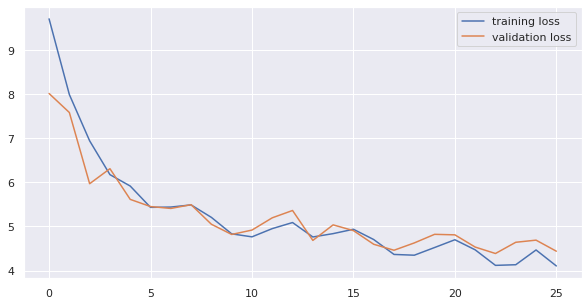

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(mae, label='training loss')
plt.plot(val_mae, label='validation loss')
plt.legend()
plt.show()

In [ ]:


training.freeze(15)
history=training.fit_onecycle(1e-4,5,checkpoint_folder='/content/drive/My Drive/DL_Project/weights/new/')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
1886/1886 [==============================] - 1958s 1s/step - loss: 35.3200 - mae: 4.3476 - val_loss: 39.5933 - val_mae: 4.6259
Epoch 2/5
1886/1886 [==============================] - 1901s 1s/step - loss: 37.6674 - mae: 4.5215 - val_loss: 43.0425 - val_mae: 4.8206
Epoch 3/5
1886/1886 [==============================] - 1895s 1s/step - loss: 40.3132 - mae: 4.6979 - val_loss: 42.6706 - val_mae: 4.8088
Epoch 4/5
1886/1886 [==============================] - 1894s 1s/step - loss: 36.7793 - mae: 4.4694 - val_loss: 39.5383 - val_mae: 4.5322
Epoch 5/5
1886/1886 [==============================] - 1890s 1s/step - loss: 31.6131 - mae: 4.1173 - val_loss: 37.8785 - val_mae: 4.3860


In [ ]:
#freezing first 15 layers and training the remaining layers
training.freeze(15)

training.fit_onecycle(1e-4,18,checkpoint_folder='/content/drive/MyDrive/DL_project/')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/18
1886/1886 [==============================] - 1280s 676ms/step - loss: 69.4709 - mae: 6.4295 - val_loss: 59.5343 - val_mae: 5.8458
Epoch 2/18
1886/1886 [==============================] - 1273s 675ms/step - loss: 46.9153 - mae: 5.2307 - val_loss: 57.0507 - val_mae: 5.6703
Epoch 3/18
1886/1886 [==============================] - 1274s 676ms/step - loss: 35.3385 - mae: 4.5213 - val_loss: 56.3068 - val_mae: 5.5842
Epoch 4/18
1886/1886 [==============================] - 1276s 677ms/step - loss: 29.1132 - mae: 4.0936 - val_loss: 55.3385 - val_mae: 5.5307
Epoch 5/18
1886/1886 [==============================] - 1276s 676ms/step - loss: 26.7194 - mae: 3.9339 - val_loss: 56.4070 - val_mae: 5.5593
Epoch 6/18
1886/1886 [==============================] - 1276s 676ms/step - loss: 25.3715 - mae: 3.8288 - val_loss: 57.7551 - val_mae: 5.6940
Epoch 7/18
1886/1886 [==============================] - 1275s 676ms/step - loss: 24.8209 -

In [ ]:
mae=[9.7028, 7.9876, 6.9388, 6.1731, 5.9146, 5.43145751953125, 5.4384589195251465, 5.487170219421387, 5.204601764678955, 4.83113431930542,4.7636 ,4.9500,5.0877,
     4.7607 ,4.8367 ,4.9354 ,4.7024 ,4.3650 ]
val_mae=[8.0117, 7.5809, 5.9674, 6.3078, 5.6124, 5.449876308441162, 5.407055854797363, 5.49222469329834, 5.0487847328186035, 4.817783355712891,4.9171,5.1950,5.3607,
         4.6827,5.0350,4.9048,4.5954,4.4600]

In [ ]:
mae.extend(history.history['mae'])
val_mae.extend(history.history['val_mae'])

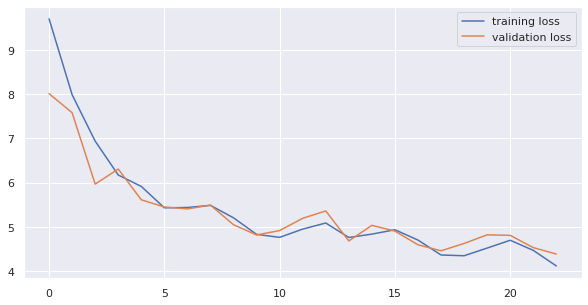

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(mae, label='training loss')
plt.plot(val_mae, label='validation loss')
plt.legend()
plt.show()

In [ ]:
print(len(mae))

26


In [ ]:
print(len(val_mae))

26


In [ ]:
history1=training.fit_onecycle(1e-4,3,checkpoint_folder='/content/drive/My Drive/DL_Project/weights/new/2/')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
1886/1886 [==============================] - 1910s 1s/step - loss: 31.6904 - mae: 4.1317 - val_loss: 40.9147 - val_mae: 4.6405
Epoch 2/3
1886/1886 [==============================] - 1920s 1s/step - loss: 36.6061 - mae: 4.4664 - val_loss: 42.2661 - val_mae: 4.6889
Epoch 3/3
1886/1886 [==============================] - 1909s 1s/step - loss: 31.2580 - mae: 4.1042 - val_loss: 38.8989 - val_mae: 4.4381


In [ ]:
training.get_weight_decay()

0.001

In [ ]:
mae.extend(history1.history['mae'])
val_mae.extend(history1.history['val_mae'])

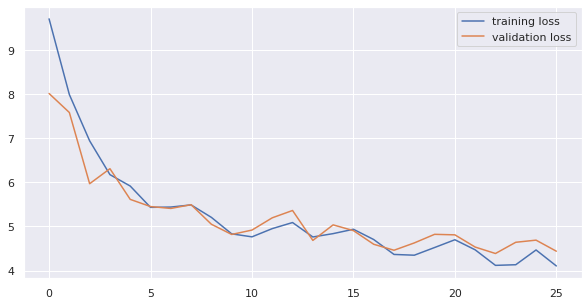

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(mae, label='training loss')
plt.plot(val_mae, label='validation loss')
plt.legend()
plt.show()

In [ ]:
print(mae)
print(val_mae)

[9.7028, 7.9876, 6.9388, 6.1731, 5.9146, 5.43145751953125, 5.4384589195251465, 5.487170219421387, 5.204601764678955, 4.83113431930542, 4.7636, 4.95, 5.0877, 4.7607, 4.8367, 4.9354, 4.7024, 4.365, 4.3475799560546875, 4.521537780761719, 4.697944164276123, 4.4693803787231445, 4.117332935333252, 4.131679534912109, 4.466404438018799, 4.104224681854248]
[8.0117, 7.5809, 5.9674, 6.3078, 5.6124, 5.449876308441162, 5.407055854797363, 5.49222469329834, 5.0487847328186035, 4.817783355712891, 4.9171, 5.195, 5.3607, 4.6827, 5.035, 4.9048, 4.5954, 4.46, 4.625881195068359, 4.820620536804199, 4.808809280395508, 4.532168865203857, 4.3859944343566895, 4.64047384262085, 4.688878536224365, 4.438120365142822]


In [ ]:
#saving the model
prediction.save('/content/drive/My Drive/DL_project/prediction')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
history2=training.fit_onecycle(1e-4,4,checkpoint_folder='/content/drive/My Drive/DL_Project/weights/new/3/')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/4
1886/1886 [==============================] - 1949s 1s/step - loss: 29.1360 - mae: 3.9710 - val_loss: 41.0773 - val_mae: 4.5950
Epoch 2/4
1886/1886 [==============================] - 1947s 1s/step - loss: 32.9834 - mae: 4.2446 - val_loss: 43.1108 - val_mae: 4.7407
Epoch 3/4
1886/1886 [==============================] - 1934s 1s/step - loss: 33.4535 - mae: 4.2780 - val_loss: 41.8797 - val_mae: 4.6225
Epoch 4/4
1886/1886 [==============================] - 1926s 1s/step - loss: 27.6990 - mae: 3.8742 - val_loss: 39.7077 - val_mae: 4.4619


In [ ]:
mae=[9.7028, 7.9876, 6.9388, 6.1731, 5.9146, 5.43145751953125, 5.4384589195251465, 5.487170219421387, 5.204601764678955, 4.83113431930542, 4.7636, 4.95, 5.0877, 4.7607, 4.8367, 4.9354, 4.7024, 4.365, 4.3475799560546875, 4.521537780761719, 4.697944164276123, 4.4693803787231445, 4.117332935333252, 4.131679534912109, 4.466404438018799, 4.104224681854248,3.9710 ,4.2446 ,4.2780 ,3.8742 ]
val_mae=[8.0117, 7.5809, 5.9674, 6.3078, 5.6124, 5.449876308441162, 5.407055854797363, 5.49222469329834, 5.0487847328186035, 4.817783355712891, 4.9171, 5.195, 5.3607, 4.6827, 5.035, 4.9048, 4.5954, 4.46, 4.625881195068359, 4.820620536804199, 4.808809280395508, 4.532168865203857, 4.3859944343566895, 4.64047384262085, 4.688878536224365, 4.438120365142822,4.5950,4.7407,4.6225,4.4619]

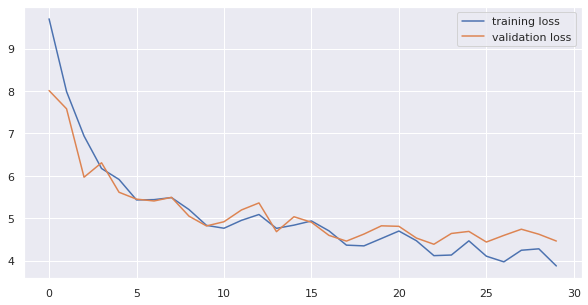

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,5))
plt.plot(mae, label='training loss')
plt.plot(val_mae, label='validation loss')
plt.legend()
plt.show()

In [ ]:
print(mae)
print(val_mae)

[9.7028, 7.9876, 6.9388, 6.1731, 5.9146, 5.43145751953125, 5.4384589195251465, 5.487170219421387, 5.204601764678955, 4.83113431930542, 4.7636, 4.95, 5.0877, 4.7607, 4.8367, 4.9354, 4.7024, 4.365, 4.3475799560546875, 4.521537780761719, 4.697944164276123, 4.4693803787231445, 4.117332935333252, 4.131679534912109, 4.466404438018799, 4.104224681854248, 3.971, 4.2446, 4.278, 3.8742]
[8.0117, 7.5809, 5.9674, 6.3078, 5.6124, 5.449876308441162, 5.407055854797363, 5.49222469329834, 5.0487847328186035, 4.817783355712891, 4.9171, 5.195, 5.3607, 4.6827, 5.035, 4.9048, 4.5954, 4.46, 4.625881195068359, 4.820620536804199, 4.808809280395508, 4.532168865203857, 4.3859944343566895, 4.64047384262085, 4.688878536224365, 4.438120365142822, 4.595, 4.7407, 4.6225, 4.4619]


## Prediction

In [ ]:
prediction_1=ktrain.get_predictor(training.model,preprocess)

In [ ]:
#function to predict the age
def predict_Age1(lis):
  pred=[]
  actual=[]
  for n in lis:
    fname=img_dir  +n
    #vis.show_image(fname)
    pred.append(round(prediction_1.predict_filename(fname)[0]))
    actual.append(int (p.search(fname).group(1)))
    #print('Predicted age : %s , Actual age : %s'%(pred,actual))
    
  return pred,actual

In [ ]:
preds,actual=predict_Age1(test_data.filenames[0:2500])

In [ ]:
def cum_score(max_tol, predictions, y_test):
  # total number of samples in the training set
  total_samples = len(y_test)
  # cumuliative score
  CS=[]
  for i in range(max_tol+1):
    abs_val = np.abs(np.squeeze(predictions) - y_test)
    # no of predictions that fall inside the tolerance level
    count = np.sum(abs_val <= i)
    CS.append(count/total_samples)
  return CS

In [ ]:
cum_scores = cum_score(20, predictions=preds, y_test=actual)

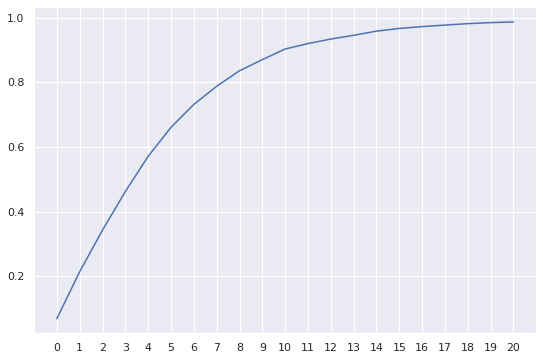

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(21), cum_scores)
plt.xticks(np.arange(21))
plt.show()

In [ ]:
df_cs = pd.Series(cum_scores)


In [ ]:
df_cs.to_csv('cum_score_CACD_2500.csv')

In [ ]:
#function to predict the age
def predict_Age1(lis):
  pred=[]
  actual=[]
  for n in lis:
    fname=img_dir  +n
    #vis.show_image(fname)
    pred.append(round(prediction.predict_filename(fname)[0]))
    actual.append(int (p.search(fname).group(1)))
    #if(np.abs(round(prediction.predict_filename(fname)[0]) - int (p.search(fname).group(1))) == 0):
     # print(fname)
      #img=image.load_img(fname,target_size=(224,224))
      
      #img_ten=image.img_to_array(img)
      #img_ten=np.expand_dims(img_ten,axis=0)
      #img_ten/=255.""
      #img_ten.shapeplt.imshow((fname)[0])
      #plt.imshow(img)
      #print('Predicted age : %s , Actual age : %s'%(pred,actual))
    
  return pred,actual


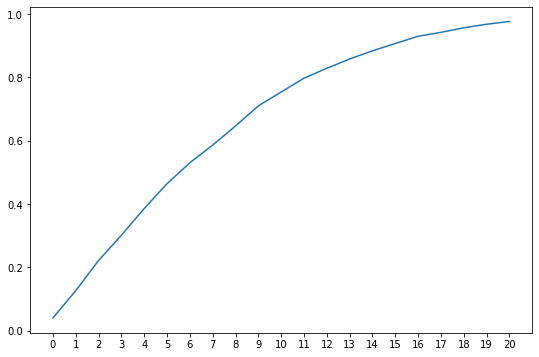

In [ ]:
preds,actual=predict_Age1(test_data.filenames[0:2500])


def cum_score(max_tol, predictions, y_test):
  # total number of samples in the training set
  total_samples = len(y_test)
  # cumuliative score
  CS=[]
  for i in range(max_tol+1):
    abs_val = np.abs(np.squeeze(predictions) - y_test)
    # no of predictions that fall inside the tolerance level
    count = np.sum(abs_val <= i)
    CS.append(count/total_samples)
  return CS

cum_scores = cum_score(20, predictions=preds, y_test=actual)
plt.figure(figsize=(9,6))
plt.plot(np.arange(21), cum_scores)
plt.xticks(np.arange(21))
plt.show()

In [ ]:
df_cs = pd.Series(cum_scores)

df_cs.to_csv('cum_score_CACD_2500_no_Aug.csv')

In [ ]:
no_aug=pd.read_csv('/content/drive/MyDrive/DL_Project/update/cum_score_CACD_2500_no_Aug.csv')
aug=pd.read_csv('/content/drive/MyDrive/DL_Project/update/cum_score_CACD_2500_Augumentation.csv')

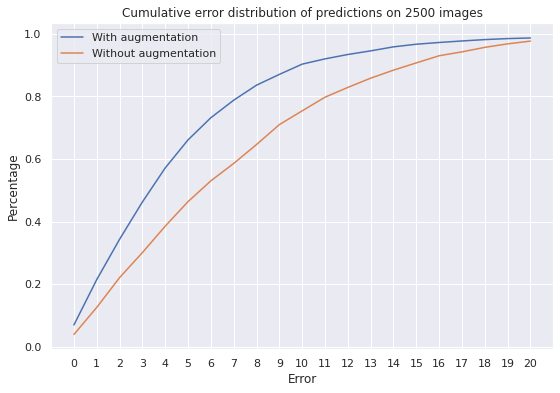

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(np.arange(21), list(aug.iloc[:, 1]),label='With augmentation')
plt.plot(np.arange(21), list(no_aug.iloc[:, 1]),label='Without augmentation')
plt.xticks(np.arange(21))
plt.xlabel('Error')
plt.ylabel('Percentage')
plt.title('Cumulative error distribution of predictions on 2500 images')
plt.legend()
plt.show()

In [ ]:
#saving the model
prediction.save('/content/drive/MyDrive/DL_project/prediction')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Filter Check

In [ ]:
#Loading a image
img_loc='/content/drive/MyDrive/DL_project/CACD_centered/photo.jpg'
img=image.load_img(img_loc,target_size=(224,224))
img_ten=image.img_to_array(img)
img_ten=np.expand_dims(img_ten,axis=0)
img_ten/=255.
img_ten.shape

(1, 224, 224, 3)

In [ ]:
layer_outputs=[layer.output for layer in model.layers[:15]]

In [ ]:
from keras import models
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
activations=activation_model.predict(img_ten)

In [ ]:
len(activations)

15

In [ ]:
activation_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 84,608
Trainable params: 0
Non-trainable params: 84,608
__________________________________________________________________________________________________


In [ ]:
first_cnn_op=activations[2]

In [ ]:
print(first_cnn_op.shape)

(1, 112, 112, 64)


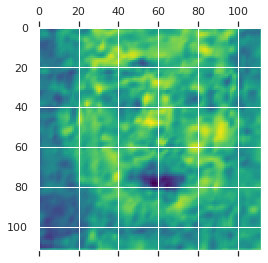

In [ ]:
plt.matshow(first_cnn_op[0,:,:,39],cmap='viridis')

conv1_conv (7, 7, 3, 64)


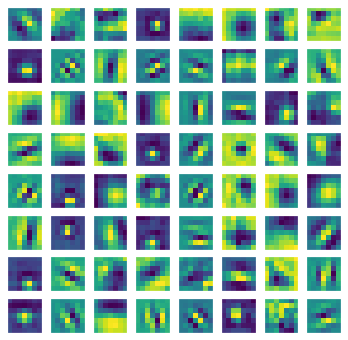

In [ ]:
layer = model.layers 

filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)

   
# plot filters

fig1=plt.figure(figsize=(6, 6))
fig1.tight_layout()
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 1], cmap='viridis') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 7,467,392
Trainable params: 0
Non-trainable params: 7,467,392
__________________________________________________________________________________________________
None


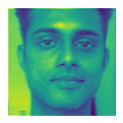

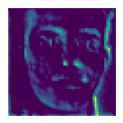

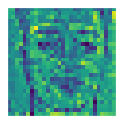

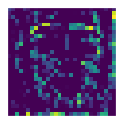

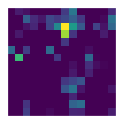

In [ ]:


#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest

conv_layer_index = [4, 18,49,70,132]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = models.Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img(img_loc, target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)



for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(2, 2))
    fig =plt.subplot(1,1,1)
    fig.set_xticks([])  #Turn off axis
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, 13], cmap='viridis')
    plt.show()

## Comparing Augumented and without Augument models

In [ ]:
train_mae_1=np.array([9.4393,7.3831,6.4295,5.2307,4.5213,4.0936 ,3.9339,3.8288,3.7833,3.7548,3.7087,3.3430 ,3.1496, 
                    3.0394 ,2.9743, 2.9433 ,2.8982 ,2.8402,2.7971,2.7520])

In [ ]:
valid_mae_1=np.array([7.5368,7.1454,5.8458, 5.6703,5.5842,5.5307,5.5593,5.6940,5.7193,5.6905,5.5768,5.2224,
                    5.1577,5.1508,5.1649,5.1419,5.1424,5.1448,5.1449,5.1415])

In [ ]:
mae=[9.7028, 7.9876, 6.9388, 6.1731, 5.9146, 5.43145751953125, 5.4384589195251465, 5.487170219421387, 5.204601764678955, 4.83113431930542, 4.7636, 4.95, 5.0877, 4.7607, 4.8367, 4.9354, 4.7024, 4.365, 4.3475799560546875, 4.521537780761719, 4.697944164276123, 4.4693803787231445, 4.117332935333252, 4.131679534912109, 4.466404438018799, 4.104224681854248,3.9710 ,4.2446 ,4.2780 ,3.8742 ]
val_mae=[8.0117, 7.5809, 5.9674, 6.3078, 5.6124, 5.449876308441162, 5.407055854797363, 5.49222469329834, 5.0487847328186035, 4.817783355712891, 4.9171, 5.195, 5.3607, 4.6827, 5.035, 4.9048, 4.5954, 4.46, 4.625881195068359, 4.820620536804199, 4.808809280395508, 4.532168865203857, 4.3859944343566895, 4.64047384262085, 4.688878536224365, 4.438120365142822,4.5950,4.7407,4.6225,4.4619]

In [ ]:
x_1=np.linspace(0,29,30)

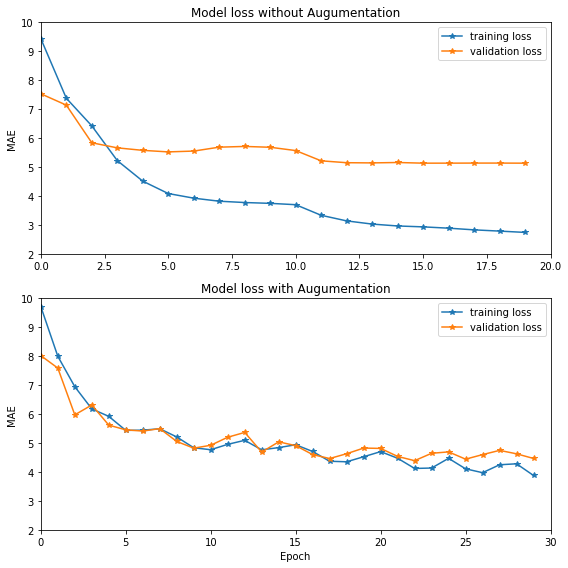

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(8,8))
ax[0].plot(x,train_mae_1,marker='*',label='training loss');
ax[0].plot(x,valid_mae_1,marker='*',label='validation loss');
ax[1].plot(x_1,mae,marker='*',label='training loss');
ax[1].plot(x_1,val_mae,marker='*',label='validation loss');
ax[0].set_xlim(0,20)
ax[0].set_ylim(2,10)
ax[1].set_xlim(0,30)
ax[1].set_ylim(2,10)

#ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("MAE")
ax[0].set_title("Model loss without Augumentation")
ax[0].legend(loc='best')

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("MAE")
ax[1].set_title("Model loss with Augumentation")
ax[1].legend(loc='best')
fig.tight_layout()
#ax[0].show()

## Real Time Prediction

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


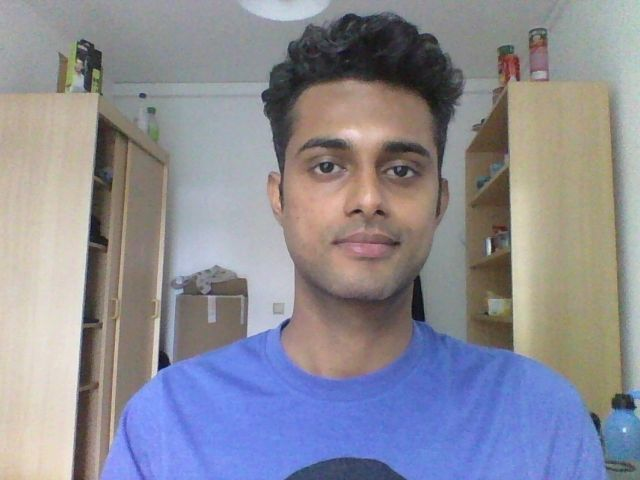

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# replace this image directory with yours
from PIL import Image
path = '/content/drive/MyDrive/DL_project/pics/' 

# directory path
orig_path = path

# folder to store the image
out_path = os.path.join(path, '/content/drive/MyDrive/DL_project/CACD_centered')

keep_picture=[]
if not os.path.exists(orig_path):
    raise ValueError(f'Original image path {orig_path} does not exist.')

if not os.path.exists(out_path):
    os.mkdir(out_path)

# looping through the images in your image directory

for picture_name in os.listdir(orig_path):
    stream = open(os.path.join(orig_path, picture_name), "rb") #read binary
    bytes = bytearray(stream.read()) #store the bytearray
    numpyarray = np.asarray(bytes, dtype=np.uint8) #convert to numpy array
    img = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)  #decode and open the image using cv2
    stream.close()
    
        
    #img = cv2.imread(os.path.join(orig_path, picture_name))
    
    
    #fiding face locations
    print(picture_name)
    faces=face_recognition.face_locations(img)
        
    #iterating each face
    for face in faces:
        #file name with face location
        
        if len(faces) !=1:
            continue
        
        t = face[0]  # top location
        r = face[1]  # right location
        b = face[2]  # bottom location
        l = face[3]  # left location


        # just checking Raschka code from here
        width = r - l # width is right minus left
        height = b - t # height is bottom minus top
        diff =  height-width
        tol = 15 # additional increment
        up_down = 5

                
        if(diff > 0):#if height is greater than width -> adding access dimension left and right and moving up by 5 + tol
            if not diff % 2:  # if symmetric
                t=t-tol-up_down 
                b=b+tol-up_down
                l=l-tol-int(diff/2)
                r=r+tol+int(diff/2)
                tmp = img[(t):(b),(l):(r),:]
            else:
                t=t-tol-up_down
                b=b+tol-up_down
                l=l-tol-int((diff-1)/2)
                r=r+tol+int((diff+1)/2)
                tmp = img[(t):(b),(l):(r),:]
        if(diff <= 0):#if width is greater than hight -> adding access dimension to up and down and moving up by 5 +tol
            if not diff % 2:  # symmetric
                t=t-tol-int(diff/2)-up_down
                b=b+tol+int(diff/2)-up_down
                l=l-tol
                r=r+tol
                tmp = img[(t):(b),(l):(r),:]
            else:
                t=t-tol-int((diff-1)/2)-up_down
                b=b+tol+int((diff+1)/2)-up_down
                l=l-tol
                r=r+tol
                tmp = img[(t):(b),(l):(r),:]
    
        
        try:
            tmp = np.array(Image.fromarray(np.uint8(tmp)).resize((224, 224), Image.ANTIALIAS))
            #A UINT8 is an 8-bit unsigned integer (range: 0 through 255 decimal). 
            #Because a UINT8 is unsigned, its first bit (Most Significant Bit (MSB)) is not reserved for signing
            
            #anti-aliasing is a technique for minimizing the distortion artifacts known as aliasing 
            #when representing a high-resolution image at a lower resolution
            
            #This function converts a numerical (integer or float) numpy array of any size and dimensionality into a image
            cv2.imwrite(os.path.join(out_path, picture_name), tmp)
            print(f'Wrote {picture_name}')
            keep_picture.append(picture_name)
            
        except ValueError:
            print(f'Failed {picture_name}')
            pass       

photo.jpg
Wrote photo.jpg


In [ ]:
def real_time_pred(fname):
    pred=round(prediction_1.predict_filename(fname)[0])
    vis.show_image(fname)
    print('Predicted age : %s'%(pred))  

Predicted age : 42


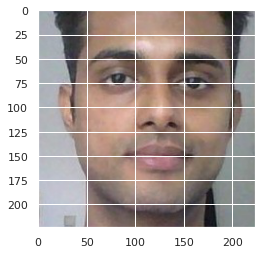

In [ ]:
real_time_pred('/content/drive/MyDrive/DL_project/CACD_centered/photo.jpg')

## Finding loss

In [ ]:
model = load_model("/content/drive/My Drive/DL_Project/CACD_preprocess/Prediction/tf_model.h5")
preproc = pickle.load(open("/content/drive/My Drive/DL_Project/CACD_preprocess/Prediction/tf_model.preproc",'rb'))

prediction = ktrain.get_predictor(model,preproc)

In [ ]:
#predictor variable
prediction=ktrain.get_predictor(training.model,preprocess)

In [ ]:
#function to predict the age
def predict_Age(lis):
  for n in lis:
    fname=img_dir  +n
    vis.show_image(fname)
    pred=round(prediction.predict_filename(fname)[0])
    actual = int (p.search(fname).group(1))
    print('Predicted age : %s , Actual age : %s'%(pred,actual))

Predicted age : 33 , Actual age : 34
Predicted age : 27 , Actual age : 24
Predicted age : 32 , Actual age : 23
Predicted age : 32 , Actual age : 40
Predicted age : 45 , Actual age : 53


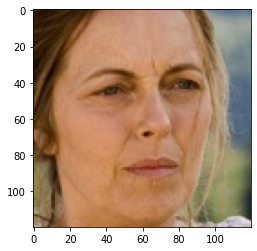

In [ ]:
predict_Age(test_data.filenames[0:5])

In [ ]:
#function to predict the age
def predict_Age(lis):
    fname=lis
    vis.show_image(fname)
    pred=round(prediction.predict_filename(fname)[0])
    actual = int (p.search(fname).group(1))
    print('Predicted age : %s , Actual age : %s'%(pred,actual))

  

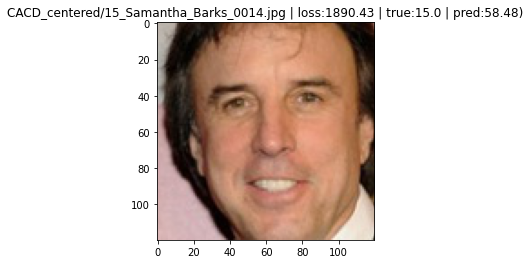

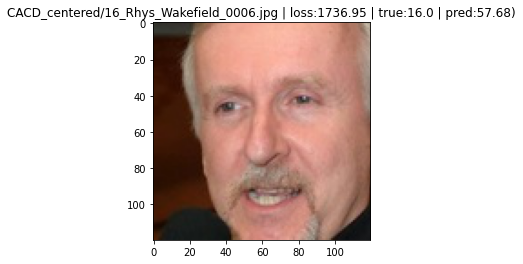

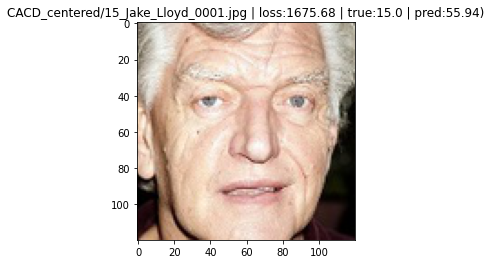

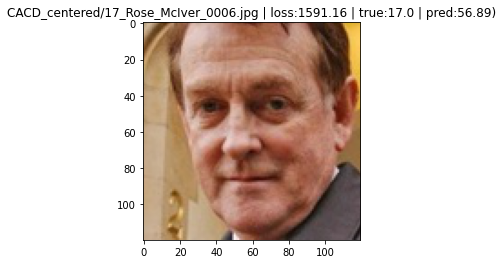

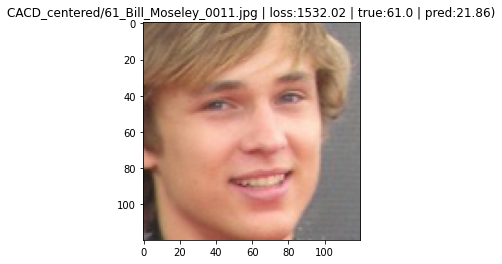

In [ ]:
training.view_top_losses(n=5)

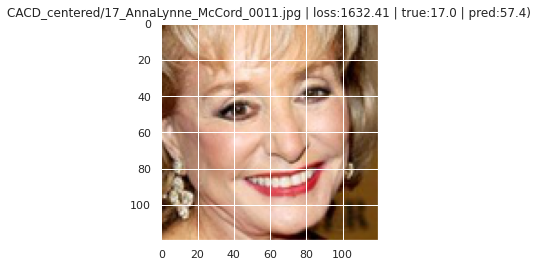

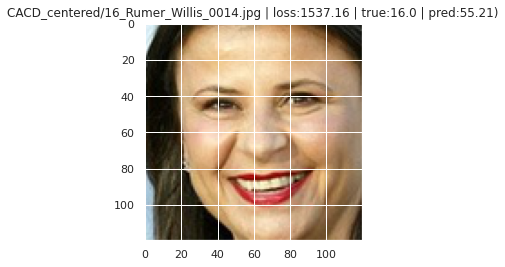

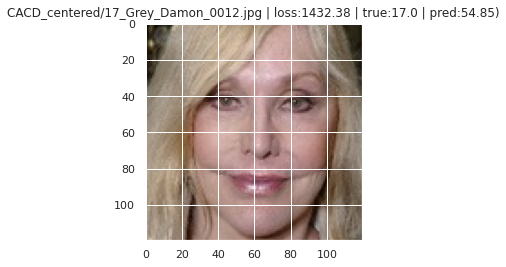

In [ ]:
training.view_top_losses(n=3)

Predicted age : 39 , Actual age : 60


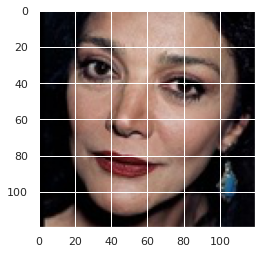

In [ ]:
predict_Age('/content/CACD_centered/60_Shohreh_Aghdashloo_0005.jpg')

Predicted age : 32 , Actual age : 54


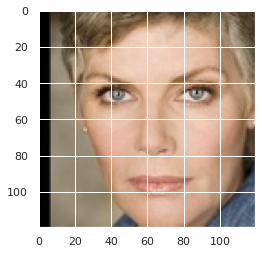

In [ ]:
predict_Age('/content/CACD_centered/54_Kelly_McGillis_0009.jpg')

Predicted age : 24 , Actual age : 47


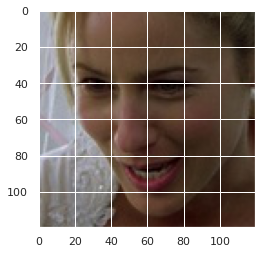

In [ ]:
predict_Age('/content/CACD_centered/47_Traylor_Howard_0014.jpg')

Predicted age : 40 , Actual age : 60


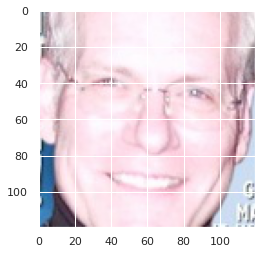

In [ ]:
predict_Age('/content/CACD_centered/60_Tim_Gunn_0003.jpg')


Predicted age : 30 , Actual age : 30


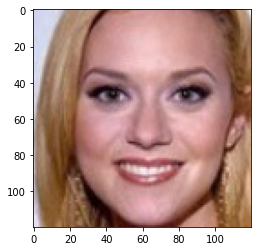

In [ ]:
predict_Age('/content/CACD_centered/30_Hilarie_Burton_0008.jpg')

Predicted age : 40 , Actual age : 40


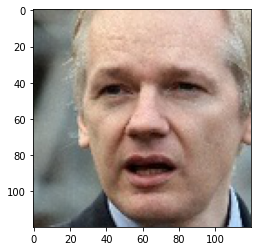

In [ ]:
predict_Age('/content/CACD_centered/40_Julian_Assange_0005.jpg')

Predicted age : 24 , Actual age : 24


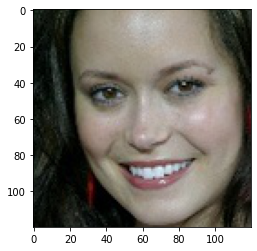

In [ ]:
predict_Age('/content/CACD_centered/24_Summer_Glau_0016.jpg')

Predicted age : 51 , Actual age : 51


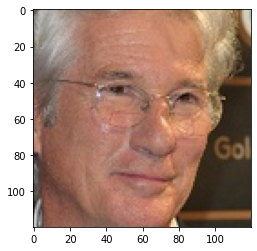

In [ ]:
predict_Age('/content/CACD_centered/51_Carey_Lowell_0009.jpg')

/content/CACD_centered/54_Kelly_McGillis_0009.jpg
/content/CACD_centered/56_Isabella_Rossellini_0011.jpg
/content/CACD_centered/60_Tim_Gunn_0003.jpg
/content/CACD_centered/47_Traylor_Howard_0014.jpg
/content/CACD_centered/60_Shohreh_Aghdashloo_0005.jpg


113

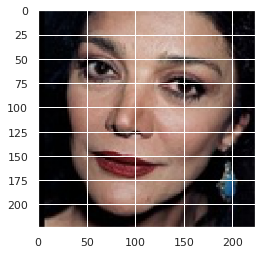

In [ ]:
#function to predict the age
def predict_Age1(lis):
  pred=[]
  actual=[]
  for n in lis:
    fname=img_dir  +n
    #vis.show_image(fname)
    pred.append(round(prediction.predict_filename(fname)[0]))
    actual.append(int (p.search(fname).group(1)))
    if(np.abs(round(prediction.predict_filename(fname)[0]) - int (p.search(fname).group(1))) >= 20):
      print(fname)
      img=image.load_img(fname,target_size=(224,224))
      
      #img_ten=image.img_to_array(img)
      #img_ten=np.expand_dims(img_ten,axis=0)
      #img_ten/=255.""
      #img_ten.shapeplt.imshow((fname)[0])
      plt.imshow(img)
      #print('Predicted age : %s , Actual age : %s'%(pred,actual))
    
  return pred,actual

preds,actual=predict_Age1(test_data.filenames[0:250])



## References

https://arxiv.org/pdf/1512.03385v1.pdf

https://arxiv.org/ftp/arxiv/papers/1709/1709.01664.pdf